In [1]:
# 1) Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2) Load & inspect
iris = datasets.load_iris()
X, y = iris.data, iris.target
print("Features shape:", X.shape)       # (150, 4)
print("Class names:", iris.target_names)


Features shape: (150, 4)
Class names: ['setosa' 'versicolor' 'virginica']


In [3]:
# 3) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [4]:
# 4) Hyperparameter tuning for k
param_grid = {'n_neighbors': list(range(1,11))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best k:", grid.best_params_['n_neighbors'])


Best k: 9


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



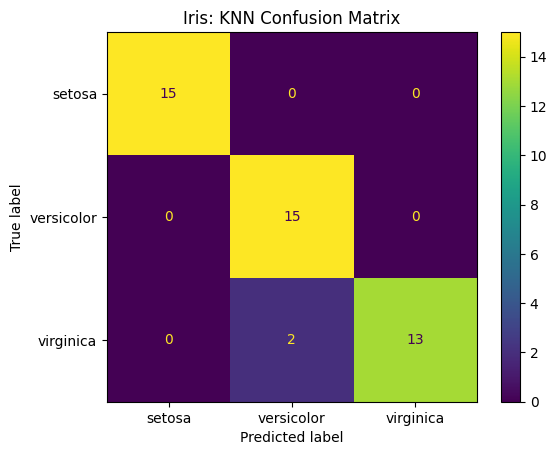

In [5]:
# 5) Evaluate on test set
knn = grid.best_estimator_
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, display_labels=iris.target_names)
plt.title("Iris: KNN Confusion Matrix")
plt.show()


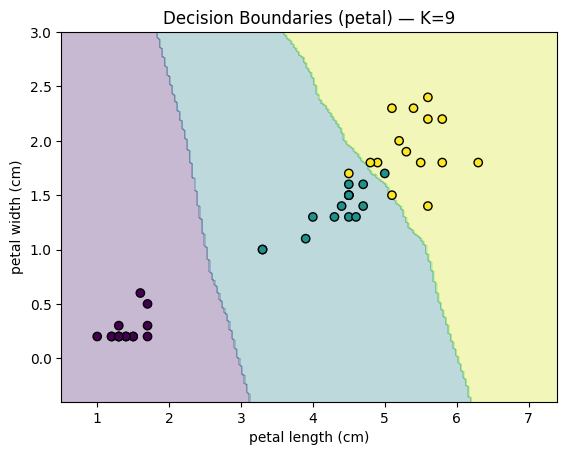

In [6]:
# 6) Decision boundary (using only 2 features for plotting)
feat_idx = [2, 3]   # petal length & width
X2 = X[:, feat_idx]
X2_train, X2_test = X_train[:, feat_idx], X_test[:, feat_idx]

knn2 = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn2.fit(X2_train, y_train)

# create meshgrid
x_min, x_max = X2[:,0].min() - .5, X2[:,0].max() + .5
y_min, y_max = X2[:,1].min() - .5, X2[:,1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_test[:,0], X2_test[:,1], c=y_test, edgecolor='k')
plt.xlabel(iris.feature_names[feat_idx[0]])
plt.ylabel(iris.feature_names[feat_idx[1]])
plt.title("Decision Boundaries (petal) — K=%d" % knn2.n_neighbors)
plt.show()
